In [1]:
# Notebook: SciKit Learn K-Means Clustering
# Author: Thomas Purk
# Date: 2025-03-29
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Reference: https://www.ibm.com/think/topics/k-means-clustering
# Reference: https://archive.ics.uci.edu/dataset/94/spambase

# K-Means Clustering

> K-means clustering is an unsupervised learning algorithm used for data clustering, which groups unlabeled data points into groups or clusters. It is one of the most popular clustering methods used in machine learning. Unlike supervised learning, the training data that this algorithm uses is unlabeled, meaning that data points do not have a defined classification structure.

[https://www.ibm.com/think/topics/k-means-clustering](https://www.ibm.com/think/topics/k-means-clustering)

**Dataset**
> Cardoso, M. (2013). Wholesale customers [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5030X.

**Feature Descriptions**
- FRESH: annual spending (m.u.) on fresh products (Continuous)

- MILK: annual spending (m.u.) on milk products (Continuous)

- GROCERY: annual spending (m.u.) on grocery products (Continuous)

- FROZEN: annual spending (m.u.) on frozen products (Continuous)

- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)

- CHANNEL: customers Channel - 1 = Horeca (Hotel/Restaurant/Cafe) or  2 = Retail channel (Nominal)

- REGION: customer's Region - 1 = Lisnon, 2 = Oporto or 3 = Other (Nominal)


In [64]:
# Notebook Setup

# Data, Arrays, Numerical Compute
import numpy as np
import pandas as pd
import scipy

# Visualization & Display
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Add for better Jupyter Notebook compatibility
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prevent Pandas and other warnings from displaying above outputcells, improve readability
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # See warnings one time

In [3]:
# Use the UC Irvine Machine Learning Repository's Python Package to load the data
#!pip install ucimlrepo
!pip list | grep ucimlrepo

ucimlrepo                          0.0.7


In [49]:
# Load Data
from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
df = pd.concat(
    objs=[wholesale_customers.data.features, wholesale_customers.data.targets],
    axis='columns')

# metadata
#print(wholesale_customers.metadata)

# variable information
#print(wholesale_customers.variables)


In [5]:
# Validate Data load
display(df.head())

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3


In [6]:
# Structural Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   Region            440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# Basic summary statistics
df.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.543182
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.774272
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,3.000000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000


# Exploratory Data Analysis

Pandas Numeric Correlation Matrix:
                    Channel     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000 -0.169172  0.460720  0.608792 -0.202046   
Fresh            -0.169172  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.244690  0.406368  0.205497  0.390947   
Region            0.062028  0.055287  0.032288  0.007696 -0.021044   

                  Detergents_Paper  Delicassen    Region  
Channel                   0.636026    0.056011  0.062028  
Fresh                    -0.101953    0.244690  0.055287  
Milk                      0.661816    0.406368  0.032288  
Grocery                   0.924641    0.205497  0.007696  
Frozen                   -0.131525    

Text(0.5, 1.0, 'Pandas Numeric Correlation Matrix')

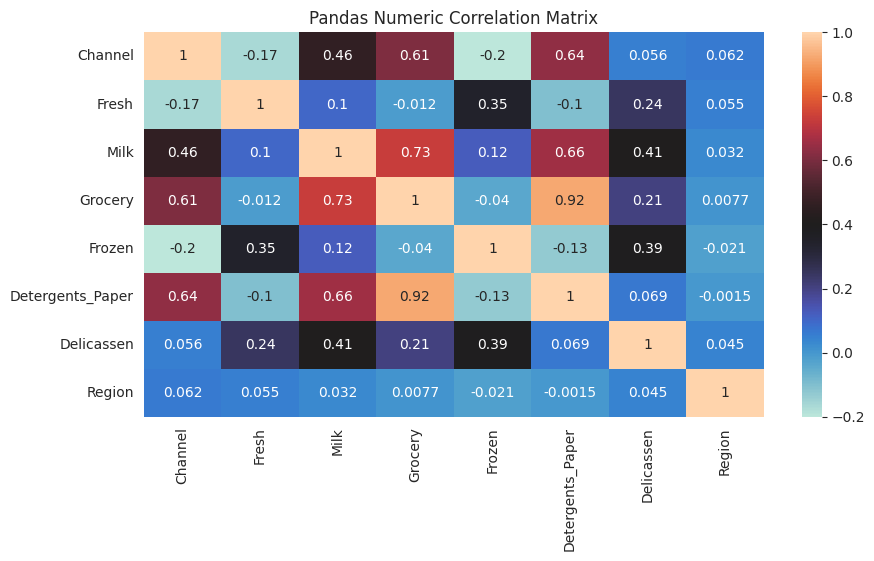

In [8]:
# Numeric correlations
corr_matrix = df.corr(numeric_only=True)
corr_matrix

# Which feature are most strongly correlated?

#list(plt.colormaps)

print("Pandas Numeric Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(10,5))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap='icefire'
)

# Add title
plt.title("Pandas Numeric Correlation Matrix")

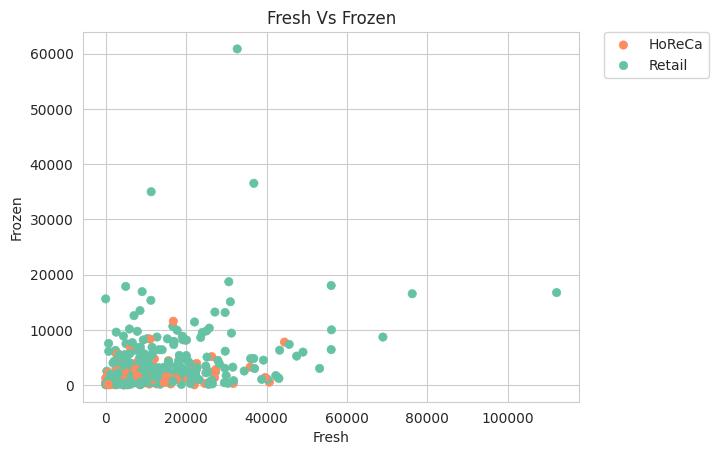

In [11]:
# Fresh vs Frozen
sns.scatterplot(
    data=df,
    x='Fresh',
    y='Frozen',
    hue='Channel',
    edgecolor=None,
    palette='Set2'
)

plt.title('Fresh Vs Frozen')
# Move the legend outside the plot
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    labels=['HoReCa','Retail']
)

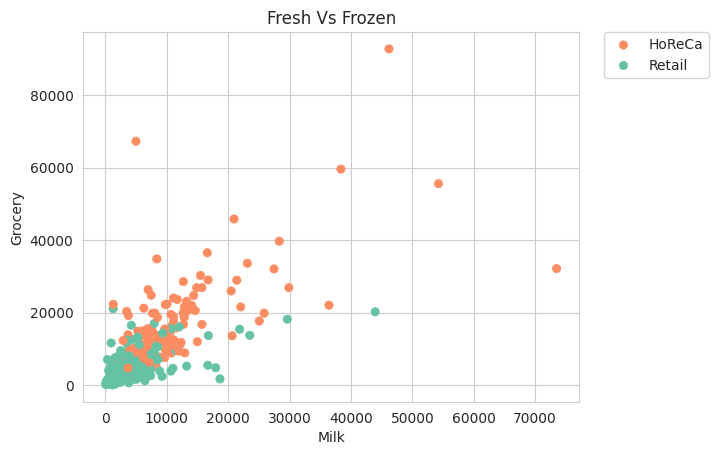

In [12]:
# Milk vs Grocery
sns.scatterplot(
    data=df,
    x='Milk',
    y='Grocery',
    hue='Channel',
    edgecolor=None,
    palette='Set2'
)

plt.title('Fresh Vs Frozen')
# Move the legend outside the plot
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    labels=['HoReCa','Retail']
)

## Data Preprocessing

- The dataset is well formatted
- No cleaning or engineering needed
- But need to one-hot encode data and apply a scaler

In [50]:
# Standardize the data (support for K-Means)

# Drop 'Channel' and 'Region' columns since they are categorical and not useful for clustering
df_sub = df.drop(['Channel', 'Region'], axis='columns')

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sub)

# Reformate the scaled nested arrays back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_sub.columns)

# Validate
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Model Training

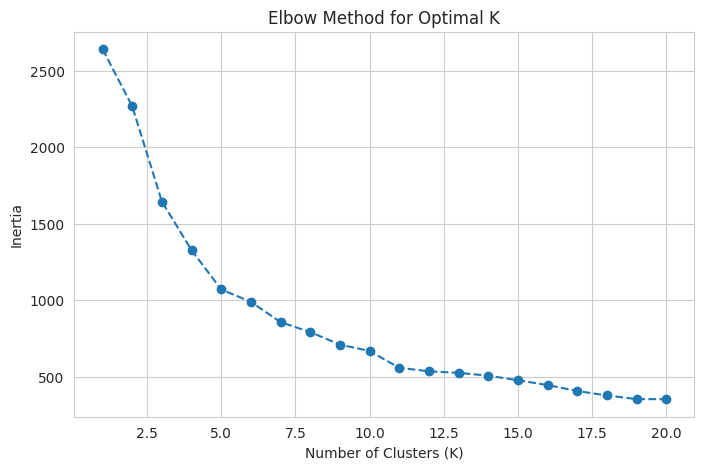

In [51]:
# Optimize the number of clusters using the Elbow Method

# track interia
inertia = []
K_range = range(1,21)
# df1 = df_scaled.drop(
#     labels=['Region_1', 'Region_2', 'Region_3'],
#     axis='columns'
# )

for k in K_range:
    kmeans_elbow = KMeans(
        n_clusters=k,
        random_state=42
    )
    kmeans_elbow.fit(df_scaled)
    inertia.append(kmeans_elbow.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [54]:
# Elbow Observation
# K=10 seems to show a slight elbow

# Create the Model
kmeans = KMeans(
    n_clusters=10,
    random_state=42
)

# Fit the model
kmeans.fit(df_scaled)

# Predict
predictions = kmeans.predict(df_scaled)

# Add the predicted cluster labels to the original dataset
df['Cluster'] = predictions

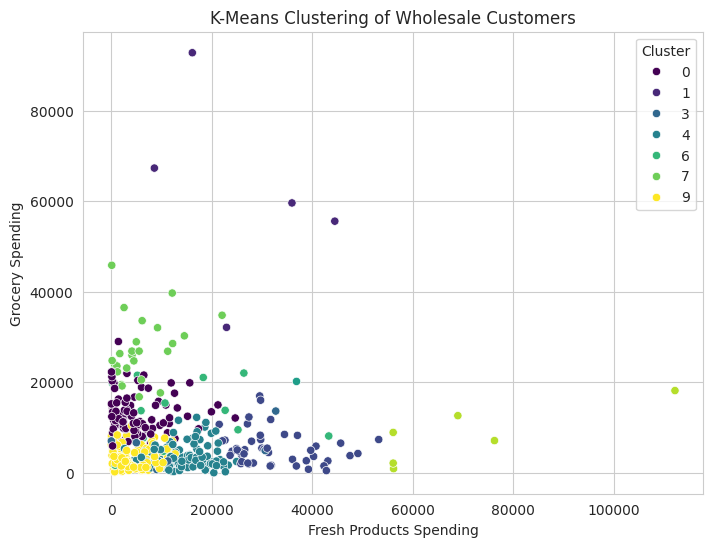

In [63]:
# Visualizing the clusters using two main features (e.g., 'Fresh' and 'Grocery')
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=df['Fresh'],
    y=df['Grocery'],
    hue=df['Cluster'],
    palette='viridis'
)

plt.xlabel('Fresh Products Spending')
plt.ylabel('Grocery Spending')
plt.title('K-Means Clustering of Wholesale Customers')
plt.legend(title="Cluster")
plt.show()


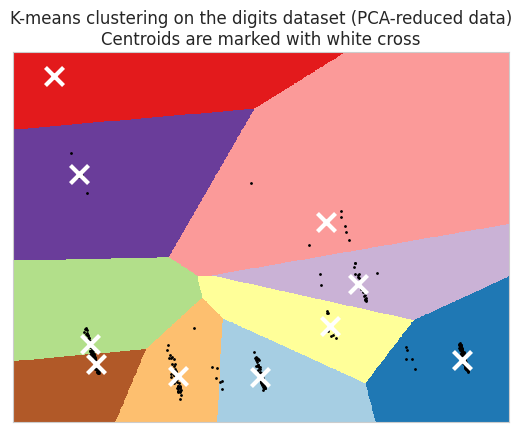

In [69]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(df_scaled)
kmeans = KMeans(
    init="k-means++",
    n_clusters=10,
    n_init=4
)

kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()